In [1]:
# imports and function definitions
import numpy as np
import sympy as sym
from scipy.integrate import solve_bvp # solve boundary value problem
from scipy.integrate import solve_ivp # solve initial value problem
from scipy.optimize import minimize
import math
pi = math.pi
%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
nt = 21
T = 1
dt = T/(nt-1)
time = np.linspace(0,T,nt)

In [3]:
def dynamics(t, q, u):
    q11, q12, q13, q14, q21, q22, q23, q24, q31, q32, q33, q34, q41, q42, q43, q44 = q 
    u1, u2, u3 = u

    dq11dt = u3*q12 - u2*q13
    dq12dt  = -u3*q11 + u1*q13
    dq13dt = u2*q11 - u1*q12
    dq14dt = q11
    dq21dt = u3*q22 - u2*q23
    dq22dt = -u3*q21 + u1*q23
    dq23dt = u2*q21 - u1*q22
    dq24dt = q21
    dq31dt = u3*q32 - u2*q33
    dq32dt = -u3*q31 + u1*q33
    dq33dt = u2*q31 - u1*q32
    dq34dt = q31
    dq41dt = u3*q42 - u2*q43
    dq42dt = -u3*q41 + u1*q43
    dq43dt = u2*q41 - u1*q42
    dq44dt = q41

    dqdt = [dq11dt, dq12dt, dq13dt, dq14dt, dq21dt, dq22dt, dq23dt, dq24dt, dq31dt, dq32dt, dq33dt, dq34dt, dq41dt, dq42dt, dq43dt, dq44dt]
    return dqdt

In [4]:
## initial conditions

q0 = np.array([[1, 0, 0,0], 
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]])
u0 = np.array([[1.0], [0.5], [0.5]])
display(u0)
u_initials = u0*np.ones((3,nt))
display(u_initials.shape)

## our initial conditions through the time line are the same. 
q0_flatten1d = q0.flatten()
q0_flatten = np.reshape(q0_flatten1d, (16, 1))

q_initials = q0_flatten*np.ones((1, nt))
display(q_initials.shape)

array([[1. ],
       [0.5],
       [0.5]])

(3, 21)

(16, 21)

In [5]:
## stack q and u initials for 101 time step into one matrix
state_initials = np.vstack((q_initials, u_initials))
display(state_initials.shape)

(19, 21)

In [6]:
sim = solve_ivp(lambda t, y: dynamics(t,y,u0), [time[0], time[-1]], q0_flatten1d, t_eval=time)

In [7]:
display(sim.y.shape)

(16, 21)

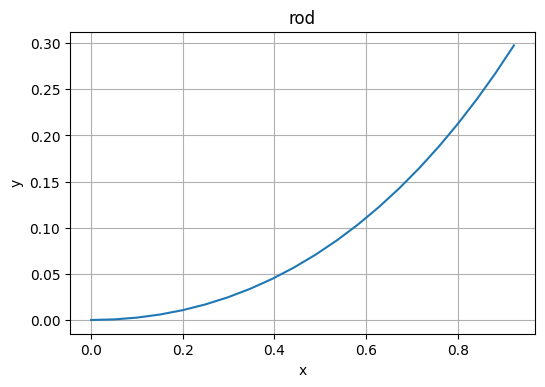

In [8]:
plt.figure(dpi=100,facecolor='w')
plt.plot(sim.y[3],sim.y[7])
axes = plt.gca()
plt.title('rod')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [9]:
display(sim.y)

array([[ 1.00000000e+00,  9.99375196e-01,  9.97503123e-01,
         9.94390957e-01,  9.90050566e-01,  9.84497934e-01,
         9.77753568e-01,  9.69842505e-01,  9.60794313e-01,
         9.50643096e-01,  9.39427488e-01,  9.27190031e-01,
         9.13975847e-01,  8.99834909e-01,  8.84820265e-01,
         8.68987880e-01,  8.52396638e-01,  8.35108344e-01,
         8.17187720e-01,  7.98702408e-01,  7.79722970e-01],
       [ 0.00000000e+00, -2.43595770e-02, -4.73782171e-02,
        -6.89705187e-02, -8.90560294e-02, -1.07557637e-01,
        -1.24405112e-01, -1.39535201e-01, -1.52891627e-01,
        -1.64425090e-01, -1.74093267e-01, -1.81861189e-01,
        -1.87700233e-01, -1.91586533e-01, -1.93504023e-01,
        -1.93444602e-01, -1.91408136e-01, -1.87402460e-01,
        -1.81443373e-01, -1.73554642e-01, -1.63767999e-01],
       [ 0.00000000e+00,  2.56091857e-02,  5.23719706e-02,
         8.01886041e-02,  1.08954898e-01,  1.38561769e-01,
         1.68897976e-01,  1.99850191e-01,  2.31303000e

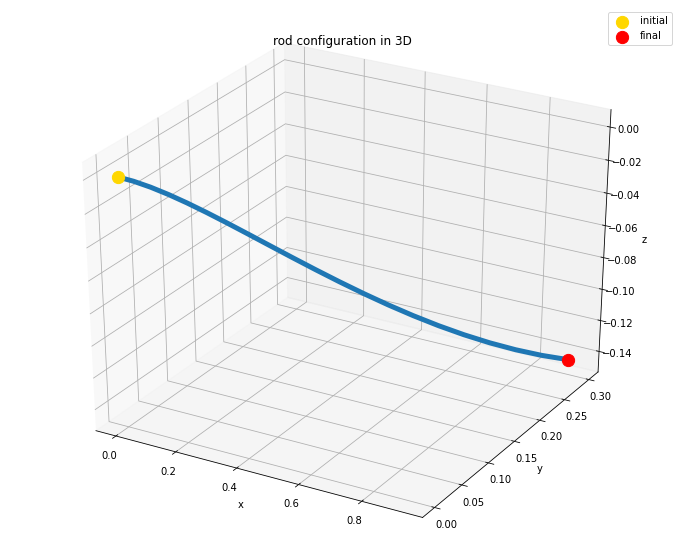

In [10]:
## plot the initial trajectory in 3D
from mpl_toolkits import mplot3d
q14, q24, q34 = sim.y[3], sim.y[7], sim.y[11]
### Interpret initial q's
x = [q14[i] for i in range(nt)]
y = [q24[i] for i in range(nt)]
z = [q34[i] for i in range(nt)]

# 3D plot
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection ='3d')
ax.scatter(x[0], y[0], z[0], marker='o', s=150, color='gold', label='initial')
ax.scatter(x[-1], y[-1], z[-1], marker='o', s=150, color='red', label='final')
ax.set_title('rod configuration in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.plot3D(x, y, z, linewidth=5)

In [11]:
# use arc trajectory as initial guess
# u0 = np.concatenate((np.ones((1,nt)),-0.5 * np.ones((1,N))),axis=0)
# xu0 = np.concatenate((sim.y,u0),axis=0) # columns are time, rows are x, y, theta, u1, u2
# xd = np.zeros((3,N))
# dt = T/(N-1)


# def cost_fun(xu,Q,R,P,N,dt,xd):
#   xu = xu.reshape((5,N))
#   x = xu[0:3,:]
#   u = xu[3:5,:]
#   x_diff = x - xd
#   running_cost = np.zeros((1,N))
#   for i in range(N):
#     running_cost[0,i] = dt * 0.5 * (np.linalg.multi_dot([x_diff[:,i].T, Q, x_diff[:,i]]) \
#                             + np.linalg.multi_dot([u[:,i].T, R, u[:,i]]))
#   cost = np.sum(running_cost) + 0.5 * (np.linalg.multi_dot([x_diff[:,N-1].T, P, x_diff[:,N-1]]))
#   return cost


# def dynamics(xu):
#   xu = xu.reshape((5,N))
#   x = xu[0:3,:]
#   u = xu[3:5,:]
#   error = np.zeros((1,3*(N)))
#   j = 0
#   for i in range(N-1):
#     error[:,j] = x[0,i+1] - (x[0,i] + dt * np.cos(x[2,i]) * u[0,i])
#     error[:,j+1] = x[1,i+1] - (x[1,i] + dt * np.sin(x[2,i]) * u[0,i])
#     error[:,j+2] = x[2,i+1] - (x[2,i] + dt * u[1,i])
#     j = j + 3
#   # enforce initial condition 
#   error[:,j] = x[0,0] - 0
#   error[:,j+1] = x[1,0] - 0
#   error[:,j+2] = x[2,0] - (pi/2)
#   return error.flatten()

In [12]:
## use arc trajectory as initial guess and stack initial u with it to form our state_initials
state_initials = np.vstack((sim.y, u_initials))
state_initials.shape

(19, 21)

In [13]:
## construct costfunction
c1, c2, c3 = 0.5, 0.5, 0.5


def cost_function(state_initials, nt, dt,c1,c2,c3):
    state_initials = state_initials.reshape((19,nt))
    running_cost = np.zeros((1,nt))
    print(state_initials.shape)
    for i in range(nt):
        running_cost[0, i] = dt*0.5*(c1*(state_initials[16,i])**2 + c2*(state_initials[17, i])**2 + c3*(state_initials[18,i]))
    cost = np.sum(running_cost)
    return cost



In [14]:
def system_dynamics(state_initials):
    nt = 21
    dt = 1/(nt - 1)
    print(state_initials.shape)
    state_initials = state_initials.reshape((19,nt))
    q = state_initials[0:16,:]
    u = state_initials[16:19,:]
    error = np.zeros((1, 16*nt))
    print(error.shape)
    j = 0
    for i in range(nt-1):
        
        error[:,j] = q[0,i+1] - (q[0,i] + dt * (u[2,i]*q[1,i] - u[1,i]*q[2,i]))
        error[:,j+1] = q[1,i+1] - (q[1,i] + dt * (-u[2,i]*q[0,i] + u[0,i]*q[2,i]))
        error[:,j+2] = q[2,i+1] - (q[2,i] + dt * (u[1,i]*q[0,i] - u[0,i]*q[1,i]))
        error[:,j+3] = q[3,i+1] - (q[3,i] + dt*q[0,i])
                                       
        error[:,j+4] = q[4,i+1] - (q[4,i] + dt * (u[2,i]*q[5,i] - u[1,i]*q[6,i]))
        error[:,j+5] = q[5,i+1] - (q[5,i] + dt * (-u[2,i]*q[4,i] + u[0,i]*q[6,i]))
        error[:,j+6] = q[6,i+1] - (q[6,i] + dt * (u[1,i]*q[4,i] - u[0,i]*q[5,i]))
        error[:,j+7] = q[7,i+1] - (q[7,i] + dt*q[4,i])
                                       
        error[:,j+8] = q[8,i+1] - (q[8,i] + dt * (u[2,i]*q[9,i] - u[1,i]*q[10,i]))
        error[:,j+9] = q[9,i+1] - (q[9,i] + dt * (-u[2,i]*q[8,i] + u[0,i]*q[10,i]))
        error[:,j+10] = q[10,i+1] - (q[10,i] + dt * (u[1,i]*q[8,i] - u[0,i]*q[9,i])) ## need to double check
        error[:,j+11] = q[11,i+1] - (q[11,i] + dt*q[8,i])
                                         
        error[:,j+12] = q[12,i+1] - (q[12,i] + dt * (u[2,i]*q[13,i] - u[1,i]*q[14,i]))
        error[:,j+13] = q[13,i+1] - (q[13,i] + dt * (-u[2,i]*q[12,i] + u[0,i]*q[14,i]))
        error[:,j+14] = q[14,i+1] - (q[14,i] + dt * (u[1,i]*q[12,i] - u[0,i]*q[13,i]))
        error[:,j+15] = q[15,i+1] - (q[15,i] + dt*q[12,i])
                                         
        j = j+ 16
            
    # enforce final condition 
    error[:,j] = q[0,-1] - 1
    error[:,j+1] = q[1,-1] - 0
    error[:,j+2] = q[2,-1] - 0
    error[:,j+3] = q[3,-1] - 1.0
                                       
    error[:,j+4] = q[4,-1] - 0
    error[:,j+5] = q[5,-1] - 1
    error[:,j+6] = q[6,-1] - 0
    error[:,j+7] = q[7,-1] - 0.5
                                       
    error[:,j+8] = q[8,-1] - 0
    error[:,j+9] = q[9,-1] - 0
    error[:,j+10] = q[10,-1] - 1
    error[:,j+11] = q[11,-1] - 0
                                         
    error[:,j+12] = q[12,-1] - 0
    error[:,j+13] = q[13,-1] - 0
    error[:,j+14] = q[14,-1] - 0
    error[:,j+15] = q[15,-1] - 1
#     error[:,j+11] = q[11,-1] - 0
                                         
    
    # enforce initial condition 
    error[:,j] = q[0,0] - 1
    error[:,j+1] = q[1,0] - 0
    error[:,j+2] = q[2,0] - 0
    error[:,j+3] = q[3,0] - 0
                                       
    error[:,j+4] = q[4,0] - 0
    error[:,j+5] = q[5,0] - 1
    error[:,j+6] = q[6,0] - 0
    error[:,j+7] = q[7,0] - 0
                                       
    error[:,j+8] = q[8,0] - 0
    error[:,j+9] = q[9,0] - 0
    error[:,j+10] = q[10,0] - 1
    error[:,j+11] = q[11,0] - 0
                                         
    error[:,j+12] = q[12,0] - 0
    error[:,j+13] = q[13,0] - 0
    error[:,j+14] = q[14,0] - 0
    error[:,j+15] = q[15,0] - 1
    errorabs = np.absolute(error)
    return errorabs.flatten()
            
            
            
                                         
            
                                         
            
            
            
        
        

    
    

In [15]:

con = ({'type': 'eq', 'fun': system_dynamics})


sol = minimize(cost_function, state_initials,args=(nt, dt,c1,c2,c3), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=con, tol=1e-3, callback=None, options=None)

(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(1

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(1

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19,

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 2

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 33

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 2

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21

(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(399,)
(1, 336)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(19, 21)
(1

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(

(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)
(399,)
(1, 336)

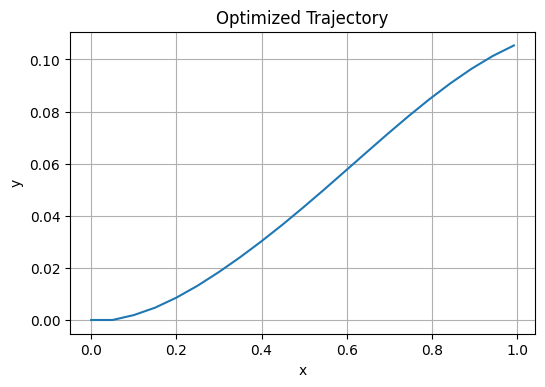

In [16]:
opt = sol.x.reshape((19,nt))
plt.figure(dpi=100,facecolor='w')
plt.plot(opt[3,:],opt[7,:])
axes = plt.gca()
# axes.set_xlim([-0.5,0.75])
# axes.set_ylim([-0.75,0.25])
plt.title('Optimized Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

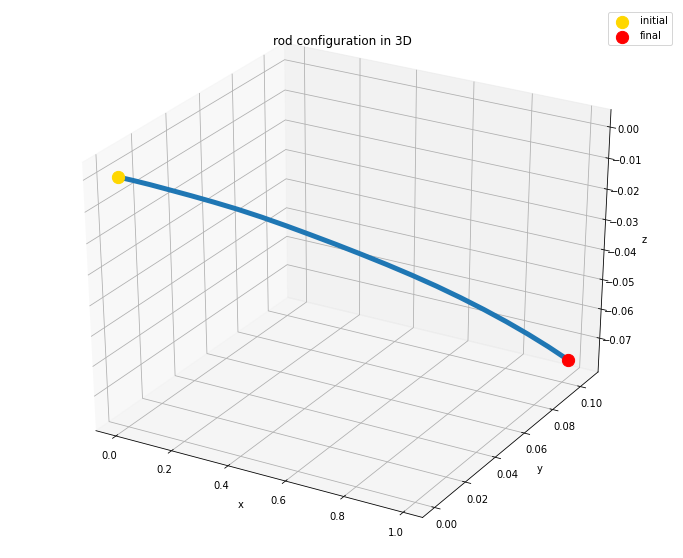

In [17]:
## plot the initial trajectory in 3D
from mpl_toolkits import mplot3d
q14, q24, q34 = opt[3], opt[7], opt[11]
### Interpret initial q's
x = [q14[i] for i in range(nt)]
y = [q24[i] for i in range(nt)]
z = [q34[i] for i in range(nt)]

# 3D plot
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection ='3d')
ax.scatter(x[0], y[0], z[0], marker='o', s=150, color='gold', label='initial')
ax.scatter(x[-1], y[-1], z[-1], marker='o', s=150, color='red', label='final')
ax.set_title('rod configuration in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.plot3D(x, y, z, linewidth=5)

In [18]:
y[-1]

0.10535709690711009

In [19]:
x[-1]

0.9924699023537724